# Importations 


In [2]:
from utils.utils_dq import * 
%matplotlib inline



### Load the environment and results from q learning algorithm

In [3]:
# Load the environment 
with open('./checkpoints/env.pickle', 'rb') as f:
    env = pickle.load(f)


In [4]:
# Load the q_tables for gamma = 0 and gamma = 0.9
with open('./checkpoints/q_tables_q_learning_0.pickle', 'rb') as f:
    [q_table_q,q_table_q1] = pickle.load(f)

with open('./checkpoints/q_tables_q_learning_09.pickle', 'rb') as f:
    [q_table_q09,q_table_q109] = pickle.load(f)
    
with open('./checkpoints/q_learning_rewards_0.pickle', 'rb') as f:
    [all_reward_q0,all_reward_q10] = pickle.load(f)
    
with open('./checkpoints/q_learning_rewards_09.pickle', 'rb') as f:
    [all_reward_q09,all_reward_q109] = pickle.load(f)
    
    


In [41]:
q_table_q09_plot = q_table_q09.copy()
for i in range(q_table_q09.shape[0]) :
    q_table_q09_plot[i,i] = np.mean(q_table_q09)
    

In [42]:
tables_q_learning = [q_table_q,q_table_q1,q_table_q09,q_table_q109]

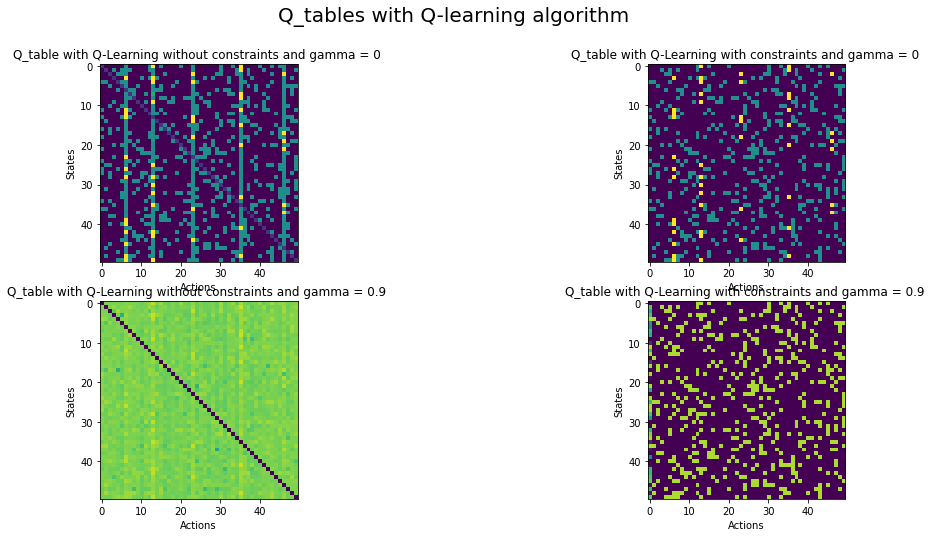

In [43]:
names = ['Q_table with Q-Learning without constraints and gamma = 0 ',\
         'Q_table with Q-Learning with constraints and gamma = 0 ' ,\
        'Q_table with Q-Learning without constraints and gamma = 0.9 ',\
         'Q_table with Q-Learning with constraints and gamma = 0.9 ' ]

f, axs = plt.subplots(2,2,figsize=(18,8))
axs = axs.reshape(-1,1)
    
for i in range(len(axs)) : 

    axs[i][0].imshow(tables_q_learning[i],cmap='viridis', vmin=0, vmax=2)
    axs[i][0].set_xlabel('Actions')
    axs[i][0].set_ylabel('States')
    axs[i][0].set_title(names[i])
        
        

plt.suptitle('Q_tables with Q-learning algorithm ', size=20)    
        
plt.show()

## Reward matrix

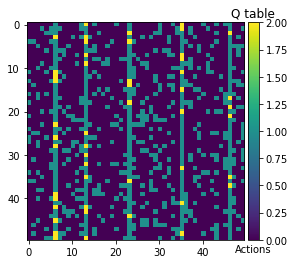

In [7]:
plot_q_table(get_matrix_rewards(env))

## Rewards

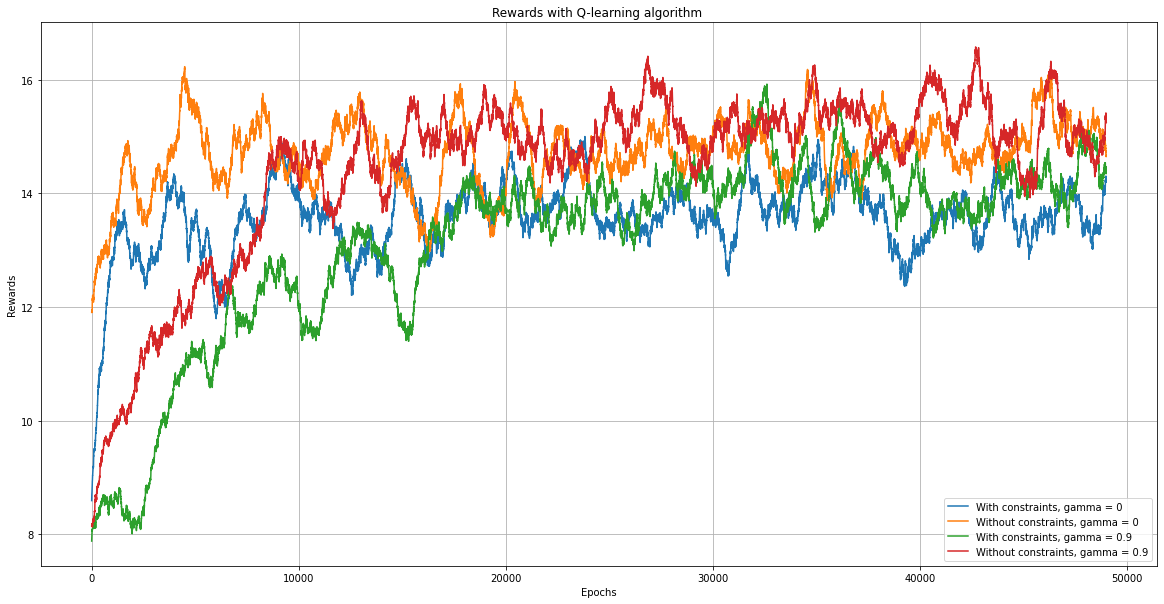

In [22]:
f, axs = plt.subplots(1,1,figsize=(20,10))

plt.plot( running_mean(all_reward_q0,1000), label ='With constraints, gamma = 0' )
plt.plot( running_mean(all_reward_q10,1000) , label ='Without constraints, gamma = 0')
plt.plot( running_mean(all_reward_q09,1000), label ='With constraints, gamma = 0.9 ' )
plt.plot( running_mean(all_reward_q109,1000) , label ='Without constraints, gamma = 0.9')

plt.xlabel('Epochs')
plt.ylabel('Rewards')
plt.title('Rewards with Q-learning algorithm ')
plt.legend()
plt.grid(True)
plt.show()


# Linear Model

## 1. Gamma = 0 and learning rate = 1e-4

In [15]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : dict_conversion['identity'] ,\
    'name_conversion_state' : 'identity',\
    'mem_size': 50,\
    'gamma' : 0 ,\
    'epsilon' : 0.1 ,\
    'learning_rate' : 1e-4,\
    'max_iter' : 100 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : LinearModel(1,CATALOGUE_SIZE)
}


In [38]:
dict_results_linear =  {}

##  One hot encoding 

$$ \LARGE \Phi(S_t = i ) = [ 0, ... , 1, ... 0         ]   $$

In [ ]:
dict_results_linear['hot_encoding'] = compare_conversion('hot_encoding', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

##  U matrix

$$ \LARGE \Phi(S_t = i ) = u_i $$

In [ ]:
dict_results_linear['u'] = compare_conversion('u', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

###  U hot encoded matrix


$$ \LARGE \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j}
\begin{cases}
    1& \text{if } u_{i,j} \ne 0   \\
    0             & \text{otherwise}
\end{cases}  $$

In [ ]:
dict_results_linear['u_hot'] = compare_conversion('u_hot', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

In [ ]:

plot_result_deep_q([1, 100,1000 , 10000],'u_hot', *dict_results_linear['u_hot'],\
                   param_deep_Q, rm = 1000)

## Rewards

$$  \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j} 
\begin{cases}
    2& \text{if j is cached and related}   \\
    1 & \text{if j is cached and not related or related and not cached} \\
    0 & \text{otherwise} 
\end{cases}  $$

In [23]:
dict_results_linear['rewards'] = compare_conversion('rewards', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 3


In [ ]:
plot_result_deep_q([1, 100,1000 , 10000],'rewards', *dict_results_linear['rewards'],\
                   param_deep_Q, rm = 1000)

In [40]:
# with open('./checkpoints/linear_gamma_0.pickle', 'wb') as f:
#     pickle.dump([dict_results_linear, param_deep_Q], f)


<module 'pickle' from '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/pickle.py'>

### Load results from previous computations

In [5]:
with open('./checkpoints/linear_gamma_0.pickle', 'rb') as f:
    [dict_results_linear, param_deep_Q] = pickle.load(f)


In [6]:
all_loss_linear_0 = [dict_results_linear[x][2][-1].all_loss for x in dict_results_linear]
all_rewards_linear_0 = [dict_results_linear[x][1][-1] for x in dict_results_linear]


In [7]:
param_linear_0 = {
    'all_loss' : all_loss_linear_0,
    'rewards' : all_rewards_linear_0,
    'names' : [x for x in dict_results_linear],
    'rm_loss' : 10000,\
    'rm_reward' : 1000,\
    'title' : 'Rewards and Loss for Linear model with gamma = 0' 
}

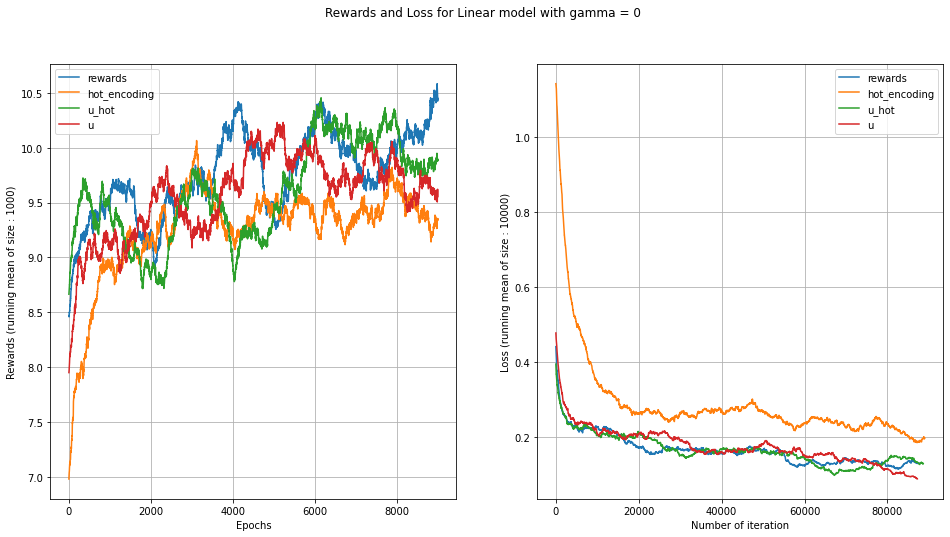

In [8]:
plot_different_loss(**param_linear_0)

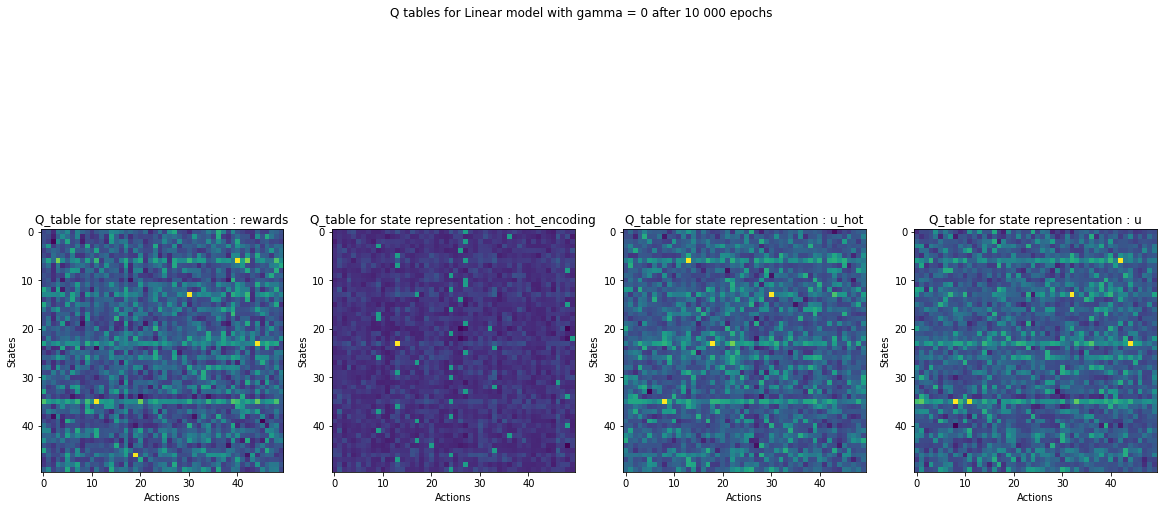

In [29]:
compare_q_tables([dict_results_linear[x][0][-1] for x in dict_results_linear],\
                 [x for x in dict_results_linear],\
                'Q tables for Linear model with gamma = 0 after 10 000 epochs')

## 2. Gamma = 0.9 and learning rate = 1e-5

In [30]:

param_deep_Q = {
    'env' : env,\
    'state_dim' : dict_conversion['identity'] ,\
    'name_conversion_state' : 'identity',\
    'mem_size': 50,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.1 ,\
    'learning_rate' : 1e-5,\
    'max_iter' : 100 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : LinearModel(1,CATALOGUE_SIZE)
}


In [31]:
dict_results_09_linear =  {}

##  One hot encoding 

In [ ]:
dict_results_09_linear['hot_encoding'] = compare_conversion('hot_encoding', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

In [ ]:
plot_result_deep_q([1, 100,1000 , 10000],'hot_encoding', \
                   *dict_results_09_linear['hot_encoding'],\
                   param_deep_Q, rm = 1000)

##  U matrix

In [ ]:
dict_results_09_linear['u'] = compare_conversion('u', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

In [ ]:
plot_result_deep_q([1, 100,1000 , 10000],'u', *dict_results_09_linear['u'],\
                   param_deep_Q, rm = 1000)

###  U hot encoded matrix


In [ ]:
dict_results_09_linear['u_hot'] = compare_conversion('u_hot', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

In [ ]:

plot_result_deep_q([1, 100,1000 , 10000],'u_hot', *dict_results_09_linear['u_hot'],\
                   param_deep_Q, rm = 1000)

## Rewards

In [ ]:
dict_results_09_linear['rewards'] = compare_conversion('rewards', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

In [ ]:
plot_result_deep_q([1, 100,1000 , 10000],'rewards', *dict_results_09_linear['rewards'],\
                   param_deep_Q, rm = 1000)

In [40]:
# with open('./checkpoints/linear_gamma_09.pickle', 'wb') as f:
#     pickle.dump([dict_results_09_linear, param_deep_Q], f)


<module 'pickle' from '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/pickle.py'>

### Load results from previous computations

In [34]:
with open('./checkpoints/linear_gamma_09.pickle', 'rb') as f:
    [dict_results_09_linear, param_deep_Q] = pickle.load(f)


In [35]:
all_loss_linear_09 = [dict_results_09_linear[x][2][-1].all_loss for x in dict_results_09_linear]
all_rewards_linear_09 = [dict_results_09_linear[x][1][-1] for x in dict_results_09_linear]


In [36]:
param_linear_09 = {
    'all_loss' : all_loss_linear_09,
    'rewards' : all_rewards_linear_09,
    'names' : [x for x in dict_results_09_linear],
    'rm_loss' : 10000,\
    'rm_reward' : 1000,\
    'title' : 'Rewards and Loss for Linear model with gamma = 0.9' 
}

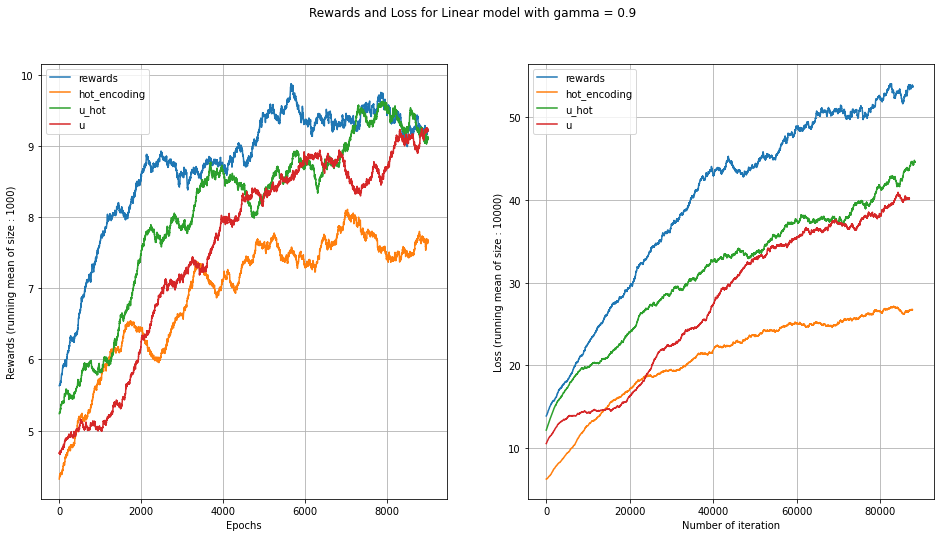

In [37]:
plot_different_loss(**param_linear_09)

In [38]:
liste_states = ['rewards', 'hot_encoding','u_hot','u']

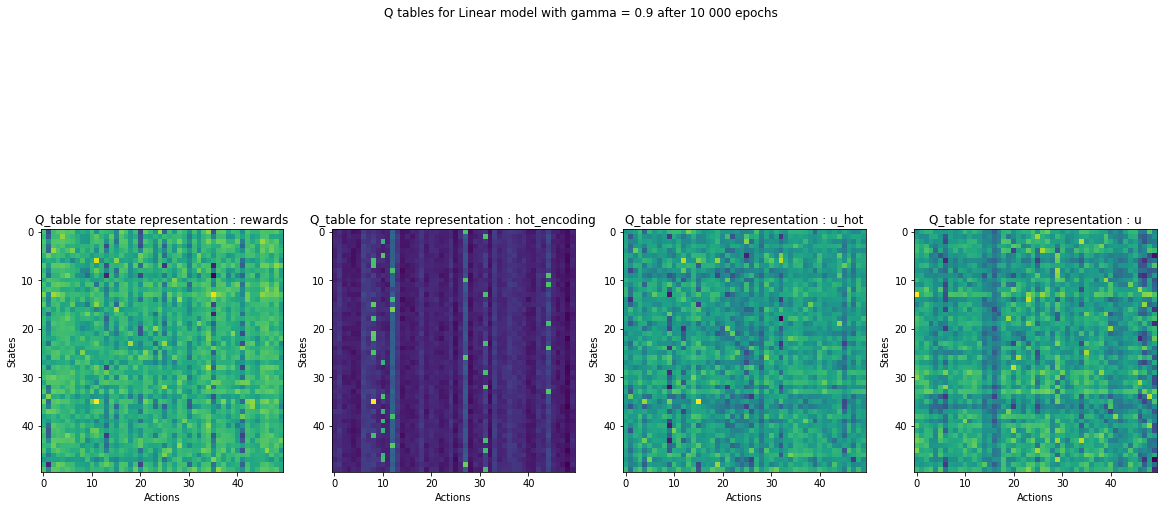

In [39]:
compare_q_tables([dict_results_09_linear[x][0][-1] for x in liste_states],\
                 liste_states,\
                'Q tables for Linear model with gamma = 0.9 after 10 000 epochs')

# Fully connected method

## 1. Gamma = 0 and learning rate = 1e-4

In [50]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : dict_conversion['u_hot'] ,\
    'name_conversion_state' : 'u_hot',\
    'mem_size': 50,\
    'gamma' : 0,\
    'epsilon' : 0.1 ,\
    'learning_rate' : 1e-4,\
    'max_iter' : 10000 , \
    'batch_size' : 10 ,
    'name' : 'test_model'
}


In [29]:
dict_results_fc_0 =  {}

## U matrix

In [65]:
dict_results_fc_0['u'] = compare_conversion('u', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 2


## U hot encoded matrix



$$ \LARGE \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j}
\begin{cases}
    1& \text{if } u_{i,j} \ne 0   \\
    0             & \text{otherwise}
\end{cases}  $$

In [30]:
dict_results_fc_0['u_hot'] = compare_conversion('u_hot', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 17


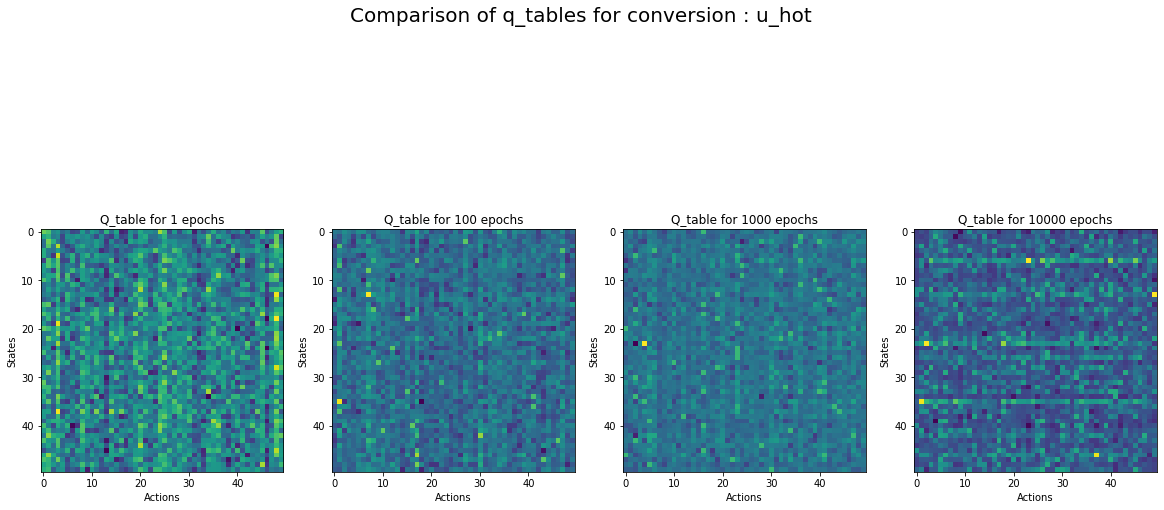

Matrix reward


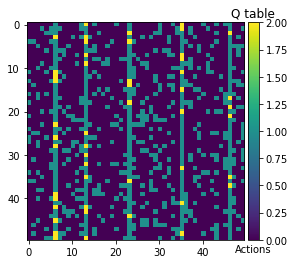

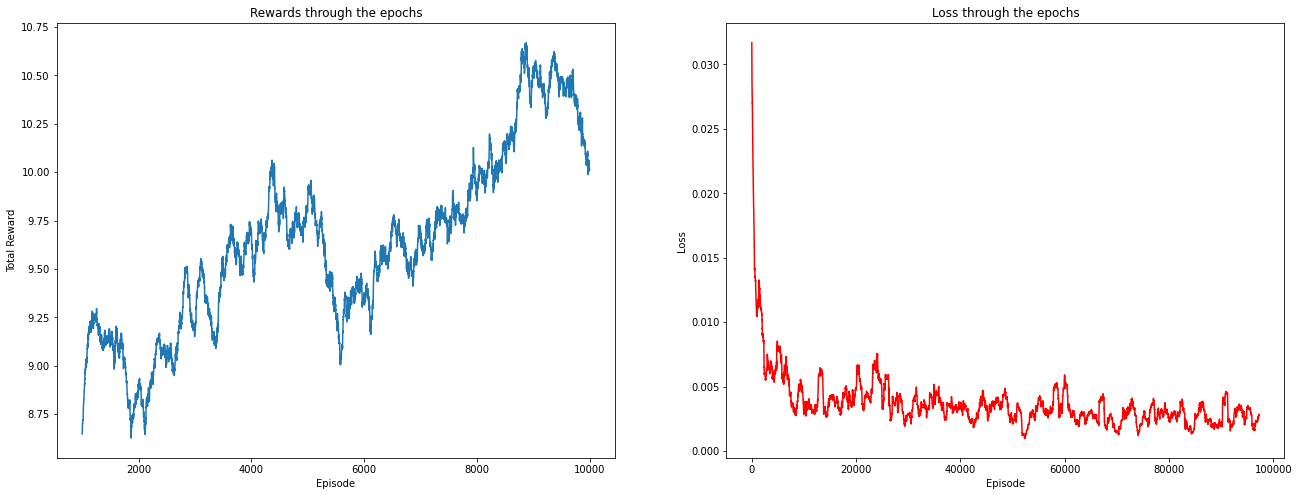

In [31]:

plot_result_deep_q([1, 100,1000 , 10000],'u_hot', *dict_results_fc_0['u_hot'],\
                   param_deep_Q, rm = 1000)

## Rewards


$$  \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j} 
\begin{cases}
    2& \text{if j is cached and related}   \\
    1 & \text{if j is cached and not related or related and not cached} \\
    0 & \text{otherwise} 
\end{cases}  $$

In [32]:
dict_results_fc_0['rewards'] = compare_conversion('rewards', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 6


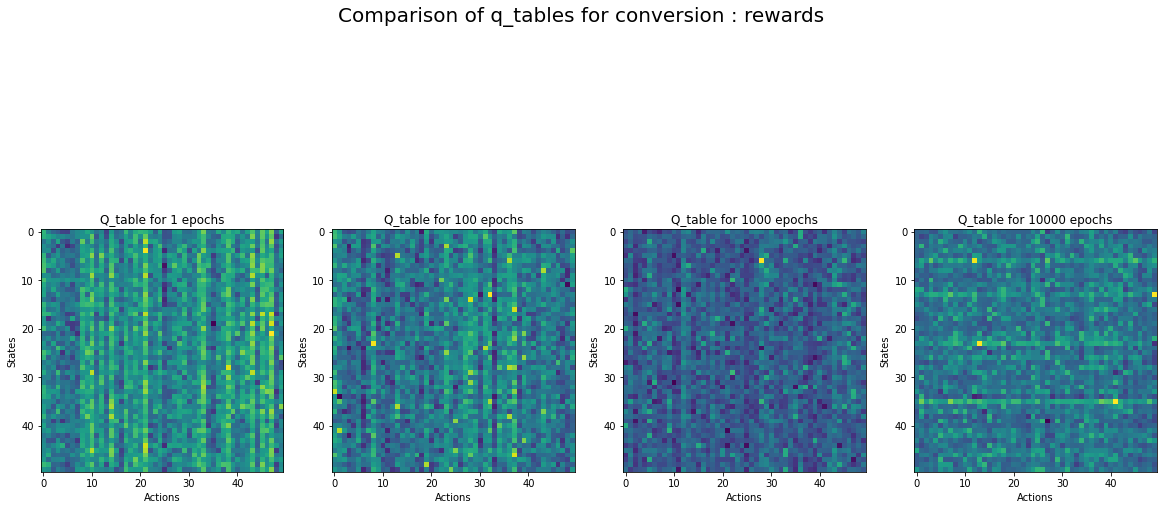

Matrix reward


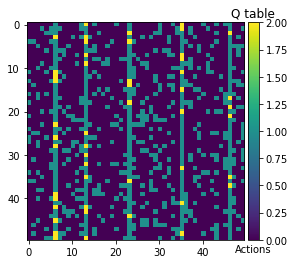

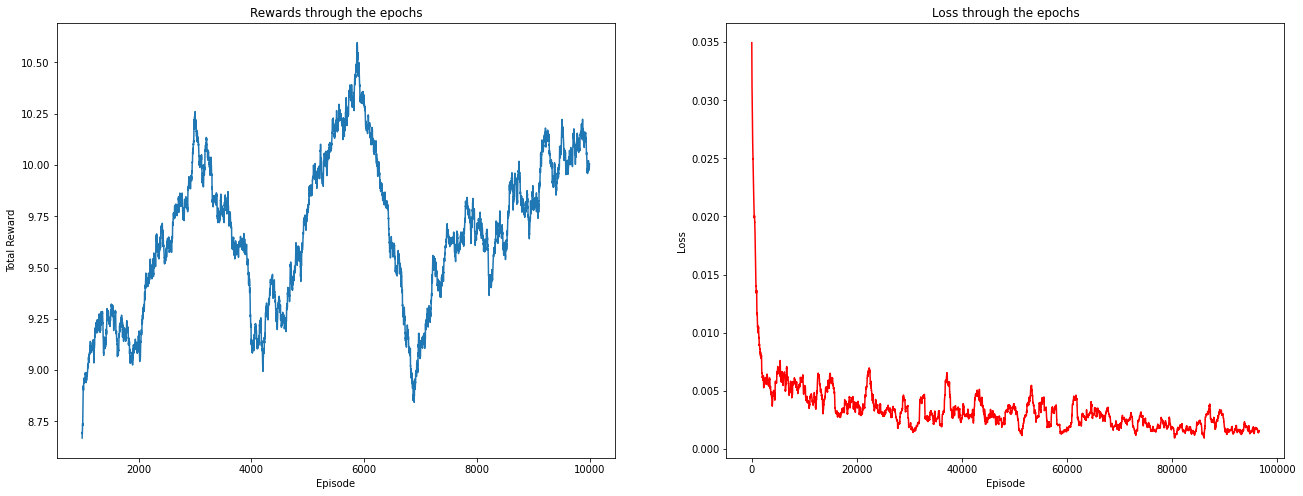

In [33]:

plot_result_deep_q([1, 100,1000 , 10000],'rewards', *dict_results_fc_0['rewards'],\
                   param_deep_Q, rm = 1000)

In [71]:

# with open('./checkpoints/deep_gamma_0.pickle', 'wb') as f:
#     pickle.dump([dict_results_fc_0, param_deep_Q], f)

/usr/local/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [42]:

with open('./checkpoints/deep_gamma_0.pickle', 'rb') as f:
    [dict_results_fc_0, param_deep_Q] = pickle.load(f)


In [43]:
all_loss_fc_0 = [dict_results_fc_0[x][2][-1].all_loss for x in dict_results_fc_0]
all_rewards_fc_0 = [dict_results_fc_0[x][1][-1] for x in dict_results_fc_0]


In [51]:
param_fc_0 = {
    'all_loss' : all_loss_fc_0,
    'rewards' : all_rewards_fc_0,
    'names' : [x for x in dict_results_fc_0],
    'rm_loss' : 10000,\
    'rm_reward' : 1000,\
    'title' : 'Rewards and Loss for fully connected model with gamma = 0' 
}

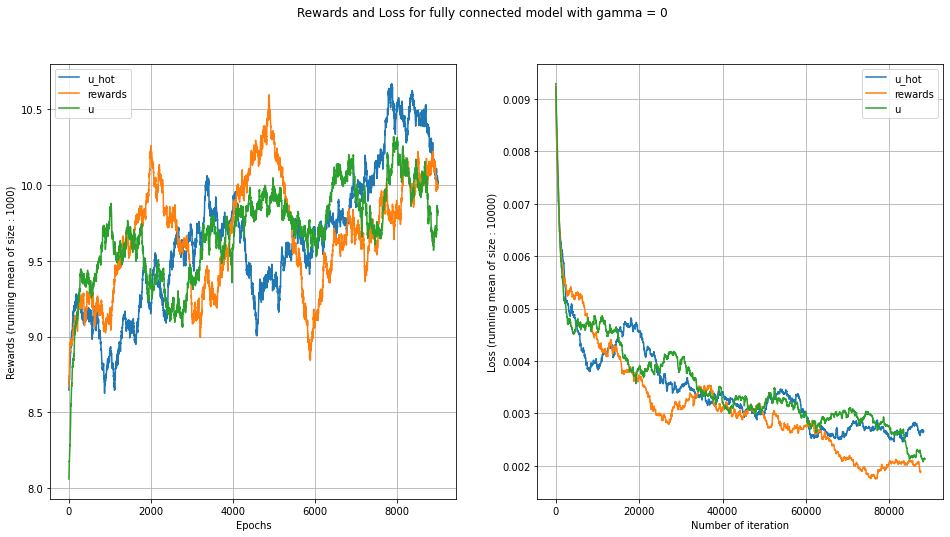

In [52]:
plot_different_loss(**param_fc_0)

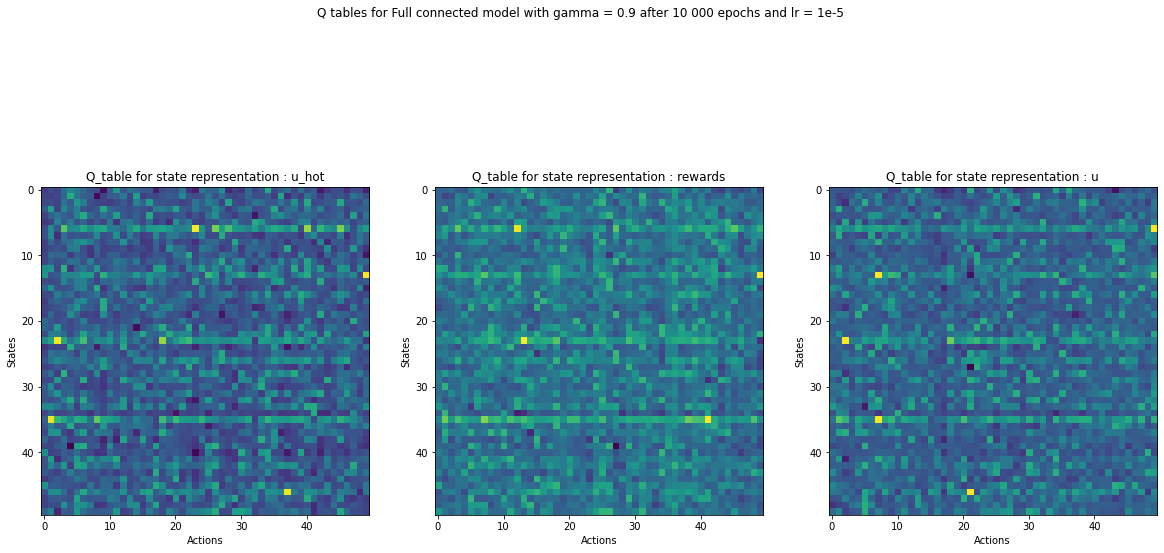

In [46]:
compare_q_tables([dict_results_fc_0[x][0][-1] for x in dict_results_fc_0],\
                 [x for x in dict_results_fc_0],\
                'Q tables for Full connected model with gamma = 0.9 after 10 000 epochs and lr = 1e-5')

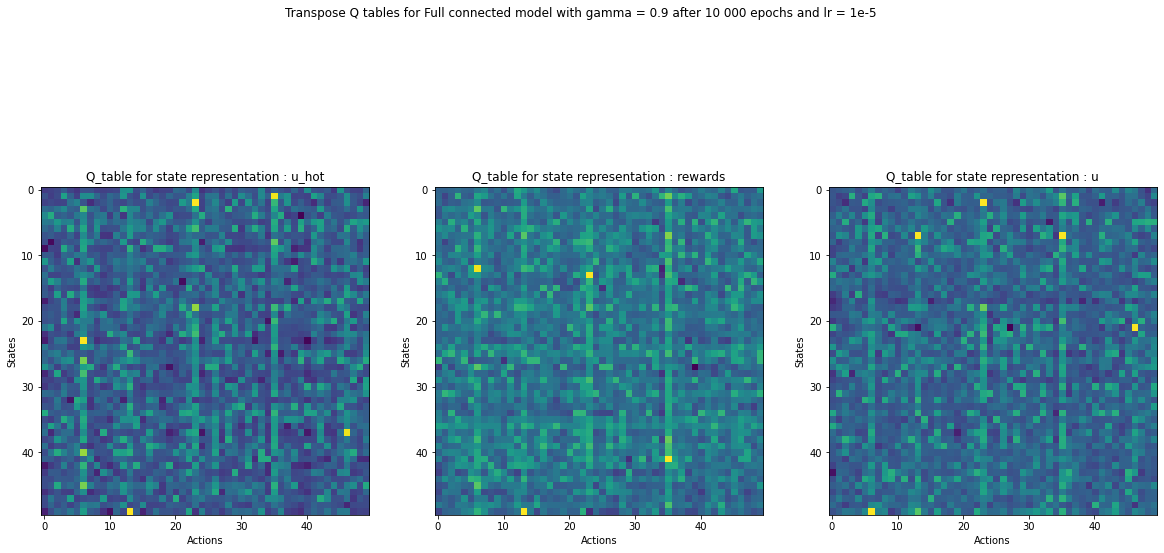

In [53]:
# Try to transpose the q tables 
compare_q_tables([torch.transpose(dict_results_fc_0[x][0][-1],0,1) for x in dict_results_fc_0],\
                 [x for x in dict_results_fc_0],\
                'Transpose Q tables for Full connected model with gamma = 0.9 after 10 000 epochs and lr = 1e-5')


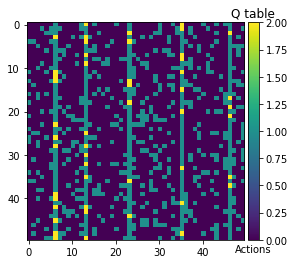

In [48]:
plot_q_table(get_matrix_rewards(env))

## 2. Gamma = 0.9 and learning rate = 1e-5

In [34]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : dict_conversion['u_hot'] ,\
    'name_conversion_state' : 'u_hot',\
    'mem_size': 50,\
    'gamma' : 0.9,\
    'epsilon' : 0.1 ,\
    'learning_rate' : 1e-4,\
    'max_iter' : 10000 , \
    'batch_size' : 10 ,
    'name' : 'test_model'
}


In [35]:
dict_results_fc_09 =  {}

##  U matrix



In [36]:
dict_results_fc_09['u'] = compare_conversion('u', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 12


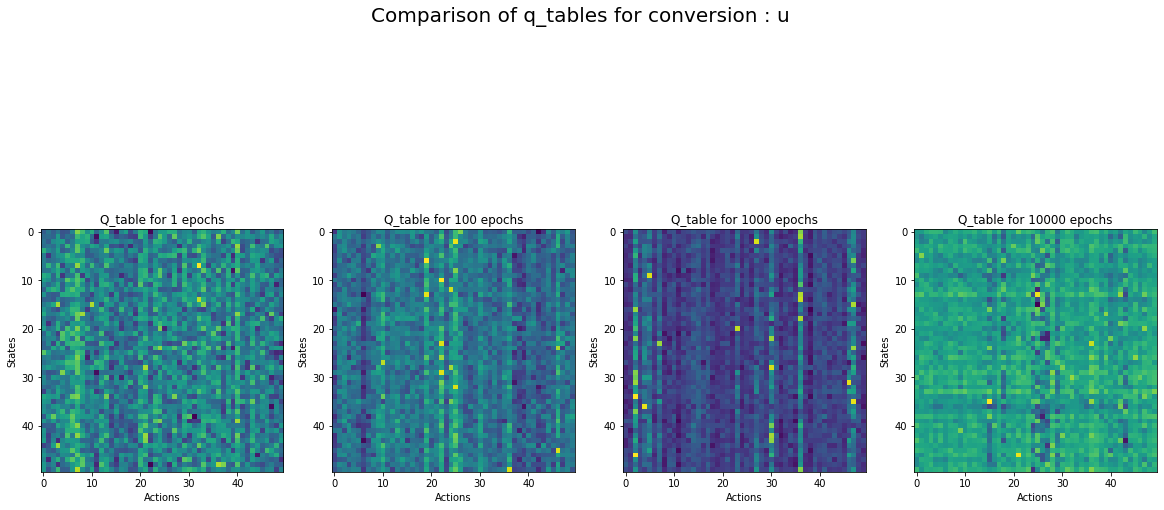

Matrix reward


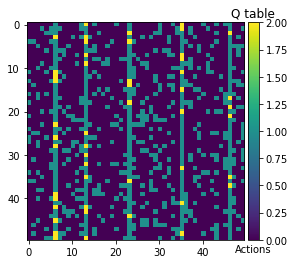

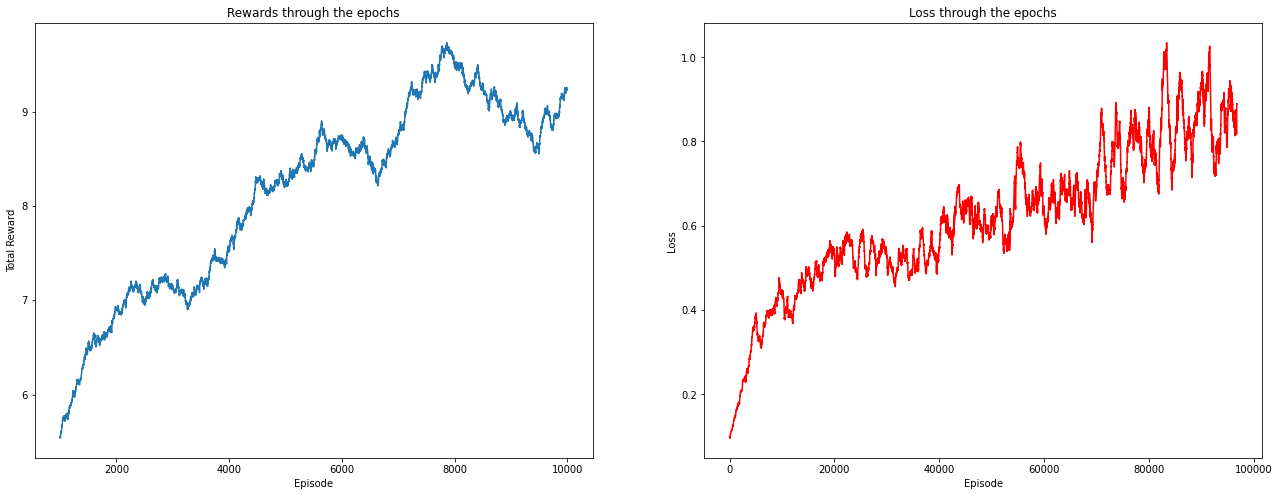

In [37]:
plot_result_deep_q([1, 100,1000 , 10000],'u', *dict_results_fc_09['u'],\
                   param_deep_Q, rm = 1000)

## U hot encoded matrix

In [38]:
dict_results_fc_09['u_hot'] = compare_conversion('u_hot', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 8


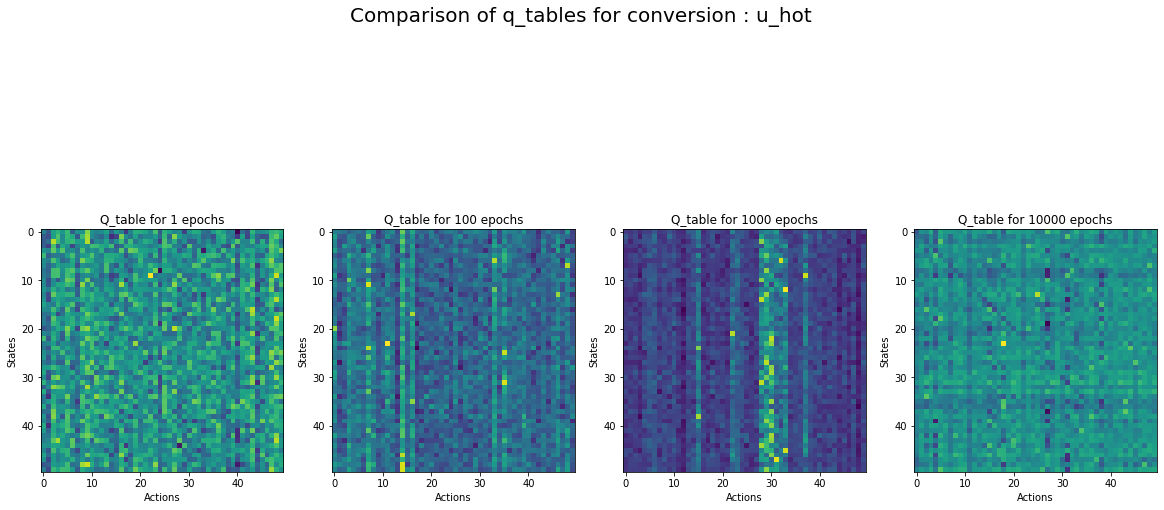

Matrix reward


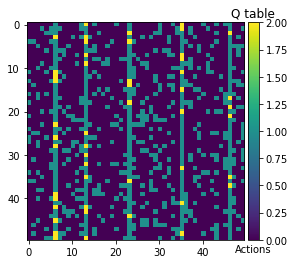

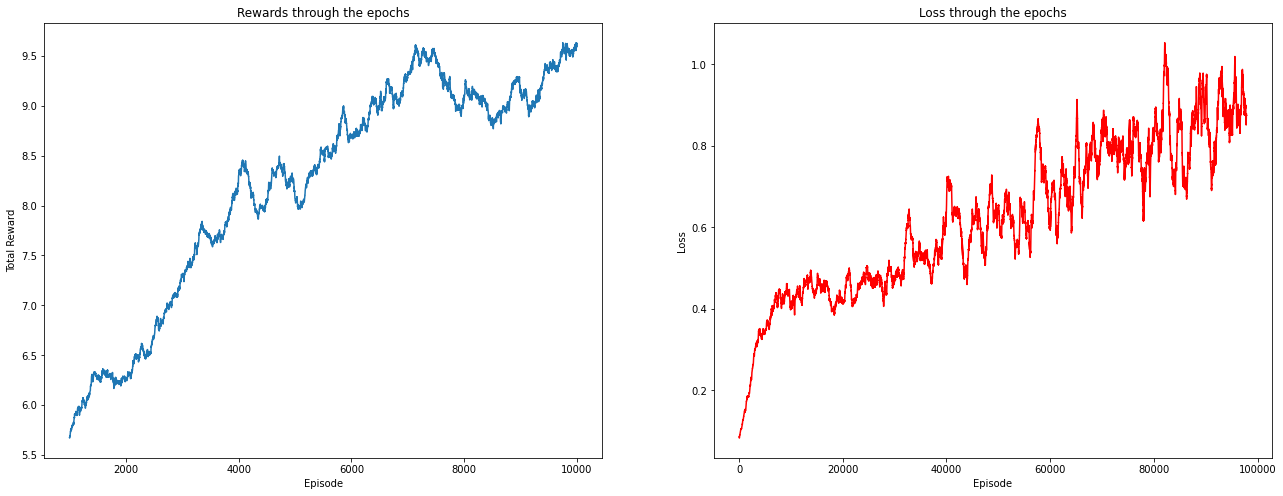

In [39]:
plot_result_deep_q([1, 100,1000 , 10000],'u_hot', *dict_results_fc_09['u_hot'],\
                   param_deep_Q, rm = 1000)

## Rewards


In [40]:
dict_results_fc_09['rewards'] = compare_conversion('rewards', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 4


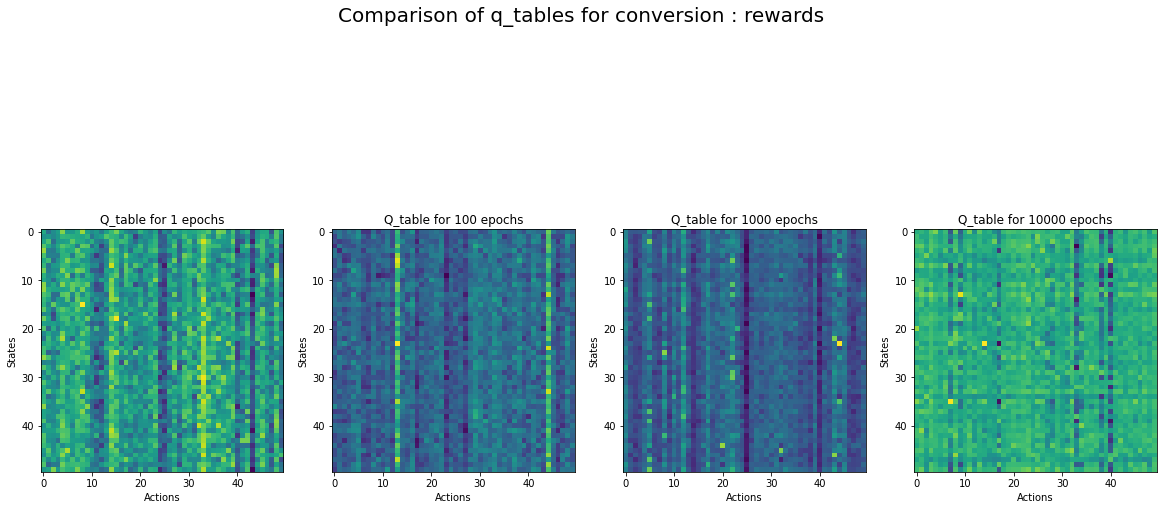

Matrix reward


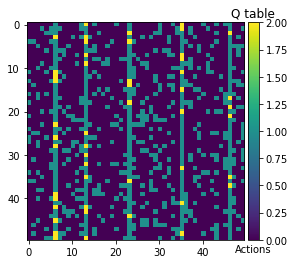

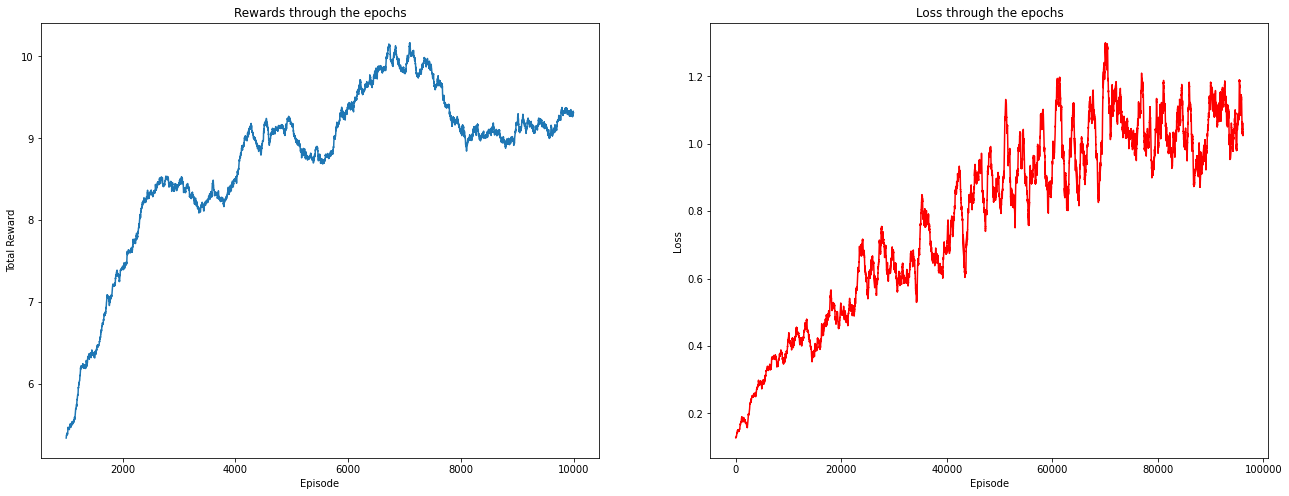

In [41]:

plot_result_deep_q([1, 100,1000 , 10000],'rewards', *dict_results_fc_09['rewards'],\
                   param_deep_Q, rm = 1000)

In [63]:

# with open('./checkpoints/deep_gamma_09.pickle', 'wb') as f:
#     pickle.dump([dict_results_fc_09, param_deep_Q], f)

/usr/local/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [54]:
with open('./checkpoints/deep_gamma_09.pickle', 'rb') as f:
    [dict_results_fc_09, param_deep_Q] = pickle.load(f)


In [55]:

all_loss_fc_09 = [dict_results_fc_09[x][2][-1].all_loss for x in dict_results_fc_09]
all_rewards_fc_09 = [dict_results_fc_09[x][1][-1] for x in dict_results_fc_09]



In [56]:
param_fc_09 = {
    'all_loss' : all_loss_fc_09,
    'rewards' : all_rewards_fc_09,
    'names' : [x for x in dict_results_fc_09],
    'rm_loss' : 10000,\
    'rm_reward' : 1000,\
    'title' : 'Rewards and Loss for Full Connected model with gamma = 0.9 and learning_rate = 1e-4' 
}

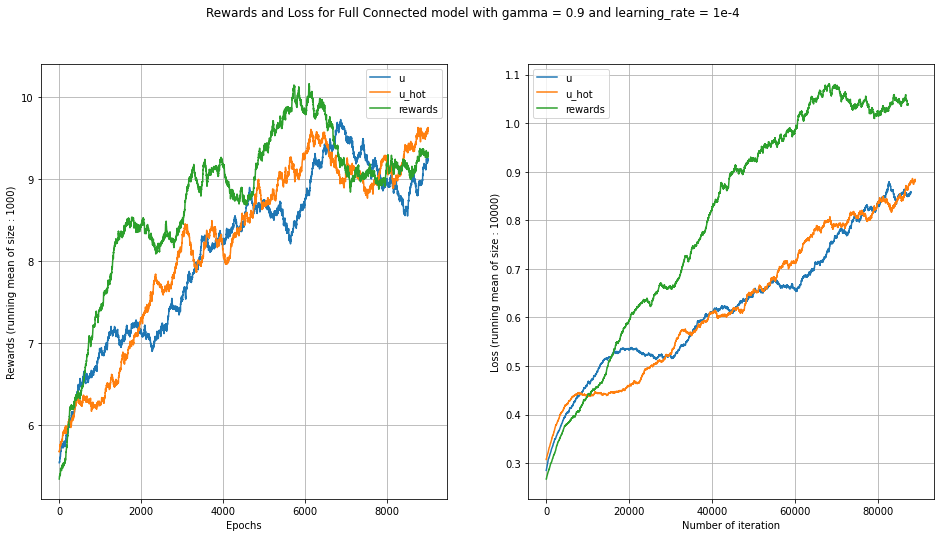

In [57]:
plot_different_loss(**param_fc_09)

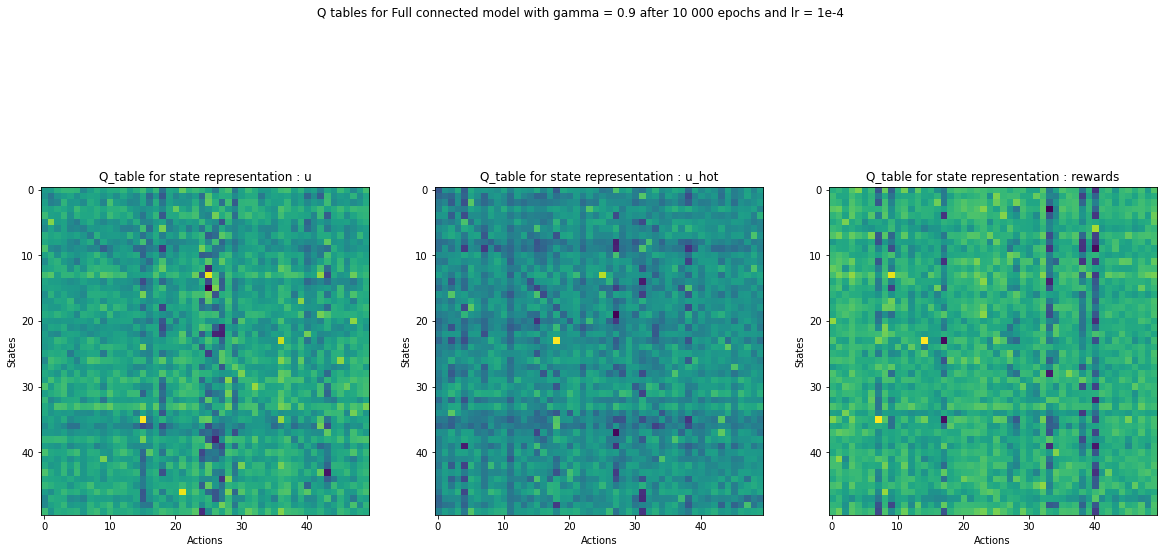

In [58]:
compare_q_tables([dict_results_fc_09[x][0][-1] for x in dict_results_fc_09],\
                 [x for x in dict_results_fc_09],\
                'Q tables for Full connected model with gamma = 0.9 after 10 000 epochs and lr = 1e-4')

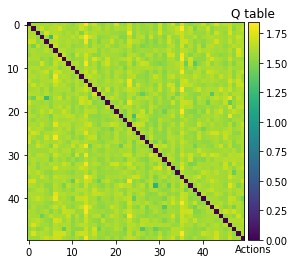

In [59]:
plot_q_table(q_table_q09)

## Comparison of the final values of the q table 

In [69]:
dic_df = {}
for x in dict_results_fc_0 : 
    dic_df[x] = torch.transpose(dict_results_fc_0[x][0][-1], 0,-1)[13]
dic_df['Q with constraints'] = q_table_q[13]
dic_df['Q without constraints'] = q_table_q1[13]
dic_df['Reward'] = get_matrix_rewards(env)[13]

In [70]:
df_0 = pd.DataFrame(dic_df)

In [71]:
df_0.head(10)

,u_hot,rewards,u,Q with constraints,Q without constraints,Reward
0,0.363220,0.965272,0.961583,1.0,1.0,1.0
1,-0.054580,0.205780,0.101139,0.0,0.0,0.0
2,-0.059671,-0.277395,-0.136941,0.0,0.0,0.0
3,0.034383,0.454041,0.141947,0.0,0.0,0.0
4,0.029950,0.081186,-0.034178,0.0,0.0,0.0
5,0.493785,0.680766,0.551183,1.0,1.0,1.0
6,0.659651,0.667273,0.707874,2.0,2.0,2.0
7,0.502488,0.232933,0.509695,1.0,1.0,1.0
8,0.073611,0.094853,0.194129,0.0,0.0,0.0
9,-0.148849,0.299082,0.023642,0.0,0.0,0.0


In [63]:
dic_df_09 = {}
for x in dict_results_fc_09 : 
    dic_df_09[x] = dict_results_fc_09[x][0][-1][13]
dic_df_09['Q without constraints'] = q_table_q09[13]
dic_df_09['Q with constraints'] = q_table_q109[13]
dic_df_09['Reward'] = get_matrix_rewards(env)[13]

In [64]:
df_09 = pd.DataFrame(dic_df_09)

In [65]:
df_09.head(10)

,u,u_hot,rewards,Q without constraints,Q with constraints,Reward
0,6.922681,6.761707,7.434882,1.675830,1.754500,1.0
1,7.183261,6.320674,8.194822,1.575607,0.000000,0.0
2,5.957031,5.622552,7.683443,1.566995,0.000000,0.0
3,6.598090,6.673605,8.524837,1.607597,0.000000,0.0
4,6.607598,5.882981,7.605851,1.610434,0.000000,0.0
5,6.283659,6.978783,7.230176,1.615704,1.748817,1.0
6,6.566412,6.576182,7.794570,1.732465,1.755284,2.0
7,7.135455,5.504116,6.097948,1.659105,1.753532,1.0
8,6.276192,6.053266,7.587946,1.580943,0.000000,0.0
9,7.282988,6.808311,9.563796,1.622672,0.000000,0.0
